In [ ]:
import pandas as pd
from data_tranform_class import DataTransform
from db_utils import RDSDatabaseConnector 

# Connecting to the database and loading the dataframe 

rds_connector = RDSDatabaseConnector()

rds_connector.connect()

df = rds_connector.load_data_from_csv(file_path='loan_payments_whole.csv')


In [ ]:
data_transformer = DataTransform(df)

# Transforming the dates and categorical columns to right data type

# date_columns = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date']
# categorical_columns = ['employment_length', 'home_ownership', 'verification_status', 'loan_status',
#                        'payment_plan', 'purpose', 'grade', 'sub_grade', 'application_type', 'term']

# data_transformer.convert_dates_to_datetime(date_columns)
# data_transformer.convert_categorical_columns(categorical_columns)

# rds_connector.save_data_to_csv(data_transformer.df, file_path='updated_loan_payments.csv', index=False)



In [ ]:
from data_frame_info import DataFrameInfo

# Evaluating the null values using the DataFrameInfo class 

df_info = DataFrameInfo(df) 


# print(df_info.count_null_values()) # looking at which the percentages of null values for each column

# columns to impute: funded_amount (5.5%), term (8.7%) int_rate (9.5%), employment length (3.9%), 
# drop null rows: last_payment_date (0.13%), last_credit_pull_date (0.013%) collections_12_mths_ex_med (0.09%)
# columns to drop (high number of NULLS): mths_since_last_delinq (57%), mths_since_last_record (88%), next_payment_date (60%), mths_since_last_major_derog (86%)

In [ ]:

# Dropping the null rows


columns_to_drop_null_rows = ['last_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med']

data_transformer.drop_rows(dropped_rows=columns_to_drop_null_rows)

# print(data_transformer.df.info())


rds_connector.save_data_to_csv(data_transformer.df, file_path='updated_loan_payments.csv', index=False) # Saving to a new csv file



In [ ]:
# Dropping columns with very high amount of nulls 57%+



columns_to_drop = ['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog']

data_transformer.drop_columns(columns_to_drop)

# print(data_transformer.df.info())


rds_connector.save_data_to_csv(data_transformer.df, file_path='updated_loan_payments.csv', index=False)


In [ ]:
from plotter_class import Plotter

# Using the Plotter class to make a decision as to what imputation we are going to be performing 

# data_plotter = Plotter(df)


# data_plotter.discrete_probability_distribution('term') # Using the mode

# data_plotter.discrete_probability_distribution('employment_length') # Using the mode




In [ ]:
# Imputing the mode on term and employment_length

data_transformer.impute_mode('term')
data_transformer.impute_mode('employment_length')


rds_connector.save_data_to_csv(data_transformer.df, file_path='updated_loan_payments.csv', index=False)

In [ ]:
# Implementing different plots to decide which imputation to use and performing these

# data_plotter = Plotter(df)


# data_plotter.histogram('int_rate') # Using mean
# data_plotter.kde_plot('funded_amount')  # Using mean

data_transformer.impute_mean('int_rate')
data_transformer.impute_mean('funded_amount')

rds_connector.save_data_to_csv(data_transformer.df, file_path='updated_loan_payments.csv', index=False)



In [ ]:
# Connecting to the new csv file and checking whether all nulls have been  removed also taking note of numeric data for the future

df_updated = rds_connector.load_data_from_csv(file_path='updated_loan_payments.csv')

df_info = DataFrameInfo(df_updated) 

# print(df_updated.columns)


# print(df_info.count_null_values())




# numeric_data = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 
# 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 
# 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']

In [ ]:
# visualising removal of NULL values


# data_plotter.compare_distributions('funded_amount', df, df_updated)


In [ ]:
# Visualising numeric features to view the skewness of each 

# data_plotter_updated = Plotter(df_updated)

# numeric_features = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'open_accounts', 'total_accounts', 'total_payment', 
# 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount']

# data_plotter_updated.kde_hist_multi(numeric_features)


In [ ]:
# Using quantitative techniques to view the skewness of each numeric feature

# df_info = DataFrameInfo(df_updated)

# df_info.data_skew(numeric_features)

# df_info.extract_statistical_values(numeric_features)

# judging by the kde plots and the skew data all columns on numeric_features but int_rate seem quite positively skewed

In [ ]:
# Comparing boxcox and log transformations and making the decision as to which to use

# df_info.compare_transformations('total_rec_int')

# loan_amound - box cox, funded_amount - box cox, funded_amount_inv - log, int_rate box cox,  instalment box cox, annual_inc box cox, 
# open_accounts box cox, total_accounts box cox, total_payment box cox, total_payment_inv log, total_rec_prncp log, total_rec_int box cox,
# total_rec_late_fee log, recoveries log, collection_recovery_fee log, last_payment_amount log

In [ ]:
# Transforming skew box cox columns

data_transformer = DataTransform(df_updated.copy())

data_transformer.boxcox_transform('loan_amount')
data_transformer.boxcox_transform('funded_amount')
data_transformer.boxcox_transform('int_rate')
data_transformer.boxcox_transform('instalment')
data_transformer.boxcox_transform('annual_inc')
data_transformer.boxcox_transform('open_accounts')
data_transformer.boxcox_transform('total_accounts')
data_transformer.boxcox_transform('total_payment')
data_transformer.boxcox_transform('total_rec_int')

rds_connector.save_data_to_csv(data_transformer.df, file_path='updated_2_loan_payments.csv', index=False) # skew transformed csv file


In [ ]:
# Transforming skew log columns

data_transformer.log_transform('funded_amount_inv')
data_transformer.log_transform('total_payment_inv')
data_transformer.log_transform('total_rec_prncp')
data_transformer.log_transform('total_rec_late_fee')
data_transformer.log_transform('recoveries')
data_transformer.log_transform('collection_recovery_fee')
data_transformer.log_transform('last_payment_amount')

rds_connector.save_data_to_csv(data_transformer.df, file_path='updated_2_loan_payments.csv', index=False) # skew transformed csv file


In [ ]:
# Checking skew transformation via plots and quantitative ways

df_updated_2 = rds_connector.load_data_from_csv(file_path='updated_2_loan_payments.csv')

df_info = DataFrameInfo(df_updated_2)

numeric_features = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'open_accounts', 'total_accounts', 'total_payment', 
                    'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount']

# df_info.data_skew(numeric_features)

data_plotter = Plotter(df_updated_2)


# data_plotter.compare_distributions('last_payment_amount', df_updated, df_updated_2)

In [ ]:
# looking for outliers using box plots and hist

# data_plotter.box_plot('last_payment_amount')

# data_plotter.histogram('last_payment_amount')

# columns_to_remove_outliers = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'open_accounts', 'total_accounts', 'total_payment', 
# 'total_payment_inv', 'total_rec_prncp', 'total_rec_int']



In [ ]:
# removing the outlies using the zscore method

data_transformer = DataTransform(df_updated_2.copy())

data_transformer.remove_outliers_zscore('loan_amount')
data_transformer.remove_outliers_zscore('funded_amount')
data_transformer.remove_outliers_zscore('funded_amount_inv')
data_transformer.remove_outliers_zscore('int_rate')
data_transformer.remove_outliers_zscore('instalment')
data_transformer.remove_outliers_zscore('annual_inc')
data_transformer.remove_outliers_zscore('open_accounts')
data_transformer.remove_outliers_zscore('total_accounts')
data_transformer.remove_outliers_zscore('total_payment')
data_transformer.remove_outliers_zscore('total_payment_inv')
data_transformer.remove_outliers_zscore('total_rec_prncp')
data_transformer.remove_outliers_zscore('total_rec_int')

rds_connector.save_data_to_csv(data_transformer.df, file_path='updated_3_loan_payments.csv', index=False) # no outliers csv file

In [ ]:
# visualising outlier removal

df_updated_3 = rds_connector.load_data_from_csv(file_path='updated_3_loan_payments.csv')

data_plotter = Plotter(df_updated_3)

# data_plotter.box_plot('total_rec_int')


# data_plotter.compare_distributions('total_rec_int', df_updated_2, df_updated_3)

In [ ]:
import seaborn as sns

# sns.pairplot(df_updated_3[numeric_features])

In [ ]:
# drawing heatmap to see correlations

# data_plotter.correlation_heatmap(numeric_features)

# Highly correlated 90%+ (loan_amount, funded_amount, funded_amount_inv, instalment), 
#(total_payment, total_payment_inv, total_rec_prncp), (collection_recovery_fee, recoveries)





In [ ]:
# dropping the highly correlated columns

data_transformer = DataTransform(df_updated_3.copy())

columns_to_drop_corr = ['funded_amount_inv', 'funded_amount_inv', 'instalment', 'total_payment_inv', 'total_rec_prncp', 'collection_recovery_fee']

data_transformer.drop_columns(columns_to_drop_corr)

rds_connector.save_data_to_csv(data_transformer.df, file_path='updated_4_loan_payments.csv', index=False) # csv with dropped highly correlated columns


In [ ]:
# for milestone 4 we are using the dataframe which only has the NULLS removed but no other Transformations

df_updated = rds_connector.load_data_from_csv(file_path='updated_loan_payments.csv')


data_transformer = DataTransform(df_updated)
# Converting date and categorical columns again prior to analysis section

date_columns = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'last_credit_pull_date']
categorical_columns = ['employment_length', 'home_ownership', 'verification_status', 'loan_status',
                        'payment_plan', 'purpose', 'grade', 'sub_grade', 'application_type', 'term']

data_transformer.convert_dates_to_datetime(date_columns)
data_transformer.convert_categorical_columns(categorical_columns)

df_updated.info()



In [ ]:
data_plotter = Plotter(df_updated)

data_info = DataFrameInfo(df_updated)



In [ ]:
import matplotlib.pyplot as plt

# Calculating the percentage of recovered amounts

# Calculating the percentage of recovered amount against the total funded amount
total_funded_amount = df_updated['funded_amount'].sum()
total_recovered_amount = df_updated['recoveries'].sum()
percentage_recovered = (total_recovered_amount / total_funded_amount) * 100

# Visualising the result
plt.figure(figsize=(8, 6))
plt.bar(['Recovered Amount', 'Unrecovered Amount'], [total_recovered_amount, total_funded_amount - total_recovered_amount])
plt.title('Percentage of Recovered Amounts Against Investor Funding')
plt.ylabel('Amount (in billions)')
plt.show()

print(f"Percentage of recovered amount against total funded amount: {percentage_recovered}")

In [ ]:
# Visualising what percentage of the total amount would be recovered up to 6 months in the future.

# Converting 'term' to a numerical value
df_updated['term_months'] = df_updated['term'].apply(lambda x: int(x.split()[0]))

df_updated['term_months'] = df_updated['term_months'].astype('int64')

# Calculating the number of months the customer has had the loan
df_updated['months_since_issue'] = (df_updated['last_payment_date'] - df_updated['issue_date']) / pd.Timedelta(days=30)

# Calculating the remaining months by subtracting from the term
df_updated['remaining_months'] = df_updated['term_months'] - df_updated['months_since_issue']

# remaining installments from costumers if less than 6 months less those are added otherwise 6 months of all others 
df_updated['remaining_instalments'] = df_updated.apply(lambda row: row['instalment'] * row['remaining_months'] if row['remaining_months'] < 6 else row['instalment'] * 6, axis=1)

total_future_recovery = df_updated['remaining_instalments'].sum()

percentage_future_recovery = (total_future_recovery / total_funded_amount) * 100

plt.figure(figsize=(8, 6))
plt.bar(['Future Recovery Amount', 'Unrecovered Amount'], [total_future_recovery, df['funded_amount'].sum() - total_future_recovery])
plt.title('Projected Percentage of Recovered Amounts in the Next 6 Months')
plt.ylabel('Amount (in billions)')
plt.show()

df_updated['remaining_months'].describe()


In [ ]:
# Filtering for loans that are charged off
charged_off_loans = df_updated[df_updated['loan_status'] == 'Charged Off']

# Calculating the percentage of charged-off loans historically
charged_off_percentage = (charged_off_loans.shape[0] / df.shape[0]) * 100

# Calculating the total amount paid towards charged-off loans
total_amount_paid_charged_off = charged_off_loans['total_payment'].sum()

print(f"Percentage of charged-off loans historically: {charged_off_percentage}")
print(f"Total amount paid towards charged-off loans: {total_amount_paid_charged_off}")

In [ ]:
# Calculating the loss in revenue for each loan

charged_off_loans['loss_in_revenue'] = charged_off_loans['instalment'] * charged_off_loans['remaining_months']

# Visualising the projected loss over the remaining term
plt.figure(figsize=(8, 6))
plt.plot(charged_off_loans['remaining_months'], charged_off_loans['loss_in_revenue'], marker='o', linestyle='-', color='red')
plt.title('Projected Loss in Revenue for Charged Off Loans Over Remaining Term')
plt.xlabel('Remaining Months')
plt.ylabel('Loss in Revenue')
plt.grid(True)
plt.show()

In [ ]:
# Identifying customers currently behind on payments
late_customers = df_updated[df_updated['loan_status'].isin(['Late (16-30 days)', 'Late (31-120 days)'])]

# Calculating the percentage of late customers
percentage_late_customers = (late_customers.shape[0] / df_updated.shape[0]) * 100

# Determining the total number of late customers
total_late_customers = late_customers.shape[0]

# Calculating the potential loss if late customers were charged off
loss_due_to_late_customers = late_customers['funded_amount'].sum()

# Estimating projected loss if late customers finish the full term
late_customers['remaining_payments_late_customers'] = late_customers['instalment'] * late_customers['remaining_months']
projected_loss_due_to_late_customers = late_customers['remaining_payments_late_customers'].sum()

# Identifying customers who have already defaulted
charged_off_customers = df_updated[df_updated['loan_status'] == 'Charged Off']

# Determining the percentage of total expected revenue from late and charged-off customers
percentage_total_loss = ((loss_due_to_late_customers + charged_off_customers['funded_amount'].sum()) / total_funded_amount) * 100

print(f"Percentage of customers currently late: {percentage_late_customers}%")
print(f"Total number of late customers: {total_late_customers}")
print(f"Potential loss due to late customers: ${loss_due_to_late_customers}")
print(f"Projected loss due to late customers finishing full term: ${projected_loss_due_to_late_customers}")
print(f"Percentage of total expected revenue from late and charged-off customers: {percentage_total_loss}%")

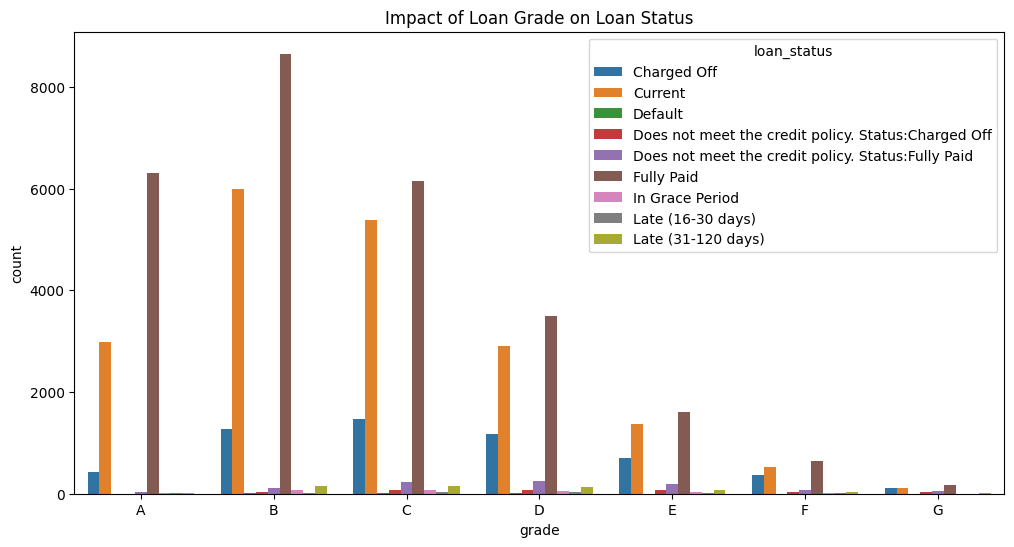

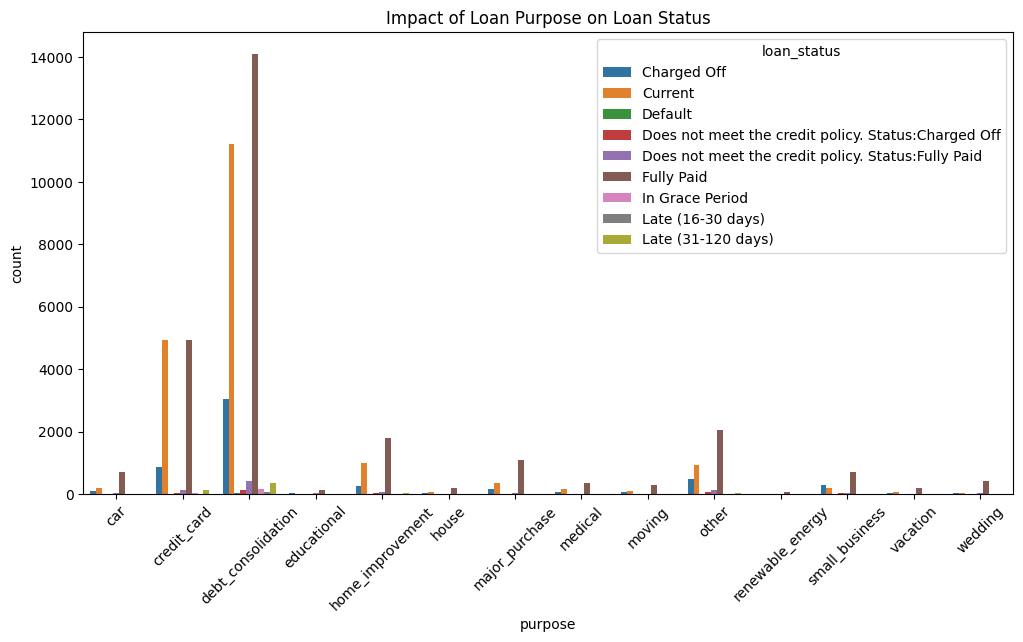

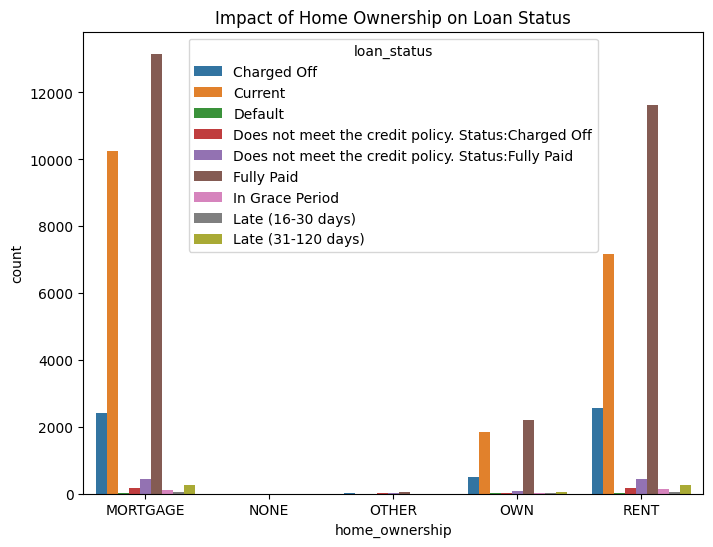

In [54]:
# Visualising indicators that a customer will not be able to pay their loans we are comparing these with the loan_status

# Grade of the loan
plt.figure(figsize=(12, 6))
sns.countplot(x='grade', hue='loan_status', data=df_updated, order=sorted(df['grade'].unique()))
plt.title('Impact of Loan Grade on Loan Status')
plt.show()

# Purpose of the loan
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', hue='loan_status', data=df_updated, order=sorted(df['purpose'].unique()))
plt.title('Impact of Loan Purpose on Loan Status')
plt.xticks(rotation=45)
plt.show()

# Home ownership
plt.figure(figsize=(8, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df_updated, order=sorted(df['home_ownership'].unique()))
plt.title('Impact of Home Ownership on Loan Status')
plt.show()

SyntaxError: unmatched ')' (4110296523.py, line 3)